# Принятие решений в бизнесе

## Задача: проверить список гипотез для увеличения выручки интернет-магазина

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import seaborn as sb
import scipy.stats as stats
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',') 
visitors = pd.read_csv('/datasets/visitors.csv', sep=',') 


In [3]:
hypothesis.columns = [x.lower() for x in hypothesis.columns] 
orders.columns = [x.lower() for x in orders.columns]
visitors.columns = [x.lower() for x in visitors.columns]

In [4]:
#visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [154]:
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [155]:
orders.head()


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [156]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [157]:
hypothesis
hypothesis['hypothesis'].unique()
#hypothesis.options.display.max_colwidth = 100 

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [158]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Приоритизация гипотез.

In [159]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']),2)
print(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

                                          hypothesis    ice
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


In [160]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])# напишите ваш код здесь 
print(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))


                                          hypothesis   rice
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Приотизация гипотез разная, потому что RICE  учитывает охват, а ICE  не учитывает.

In [161]:
# Посмотрим количество посещений и заказов по группам
print ('Посещения в группе А:', visitors.query('group == "A"')['visitors'].sum())
print ('Посещения в группе B:',visitors.query('group == "B"')['visitors'].sum())
print ('Заказы в группе А:', orders.query('group == "A"').shape[0])
print ('Заказы в группе B:',orders.query('group == "B"').shape[0])


Посещения в группе А: 18736
Посещения в группе B: 18916
Заказы в группе А: 557
Заказы в группе B: 640


Приотизация ICE в тройку лидеров вошли гипотезы:

    8. Запустить акцию, дающую скидку на товар в день рождения
    0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
    7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
    
 Приотизация гипотез RICE немного изменилась: 
 
    7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
    0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'

Проверим есть ли покупатели, которые вошли в обе группы 

In [162]:
orders['visitorid'].nunique()

1031

In [163]:

id_ab = np.intersect1d(orders[orders['group']=='A']['visitorid'], orders[orders['group']=='B']['visitorid'])
len(id_ab)

58

In [164]:
orders = orders.query('visitorid not in @id_ab')
orders['visitorid'].nunique()

973

In [165]:
# создаем массив уникальных пар значений дат и групп 
datesGroups = orders[['date','group']].drop_duplicates()

In [166]:
ordersAggregated = (datesGroups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date']
                                                            , orders['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionid':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))


In [167]:
ordersAggregated.rename(columns={'transactionid':'orders'}, inplace=True)
    

In [168]:
ordersAggregated
    

,date,group,revenue,orders
55,2019-08-01,A,142779,23
66,2019-08-01,B,59758,17
175,2019-08-02,A,234381,42
173,2019-08-02,B,221801,40
291,2019-08-03,A,346854,66
...,...,...,...,...
533,2019-08-29,B,4746610,510
757,2019-08-30,A,3311413,460
690,2019-08-30,B,4955833,531
958,2019-08-31,A,3364656,468


In [169]:
visitorsAggregated = (datesGroups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitorsAggregated.head()

visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [170]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date','group'])
cumulativeData.head()

,date,group,revenue,orders,visitors
0,2019-08-01,A,142779,23,719
1,2019-08-01,B,59758,17,713
2,2019-08-02,A,234381,42,1338
3,2019-08-02,B,221801,40,1294
4,2019-08-03,A,346854,66,1845


In [171]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

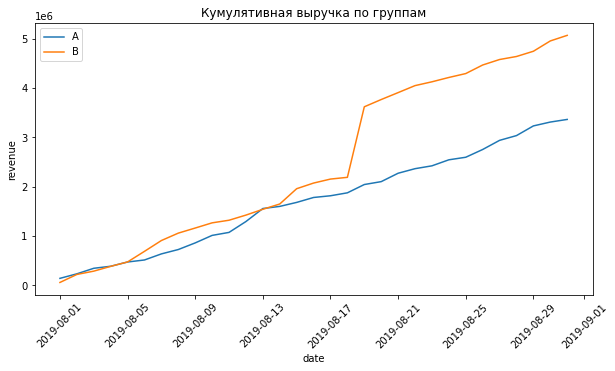

In [201]:
#Построим график кумулятивной выручки по группам
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.xlabel("date")
plt.ylabel("revenue");

Группа А растет постепенно, в группе В есть резкий рост после 17.08. Возможно, там были очень большие покупки

**Построем график кумулятивного среднего чека по группам.**

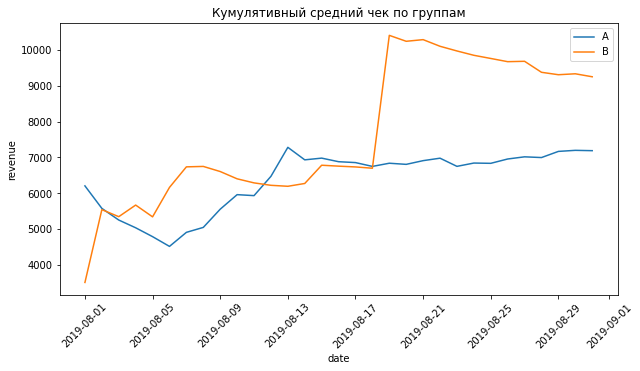

In [202]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.xlabel("date")
plt.ylabel("revenue");

Средний чек группы B подскакивает до 15.03 и после 01.04 это подтверждает большие заказы

**Построем график относительного изменения кумулятивного среднего чека группы B к группе A.**

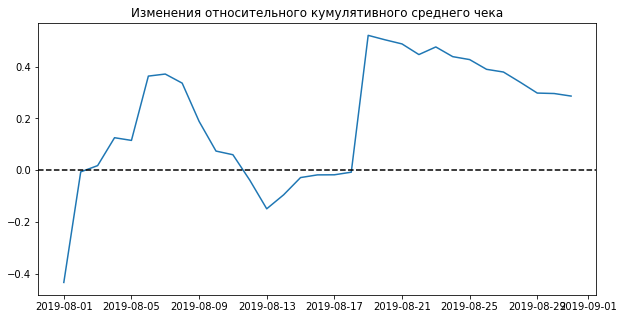

In [174]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Изменения относительного кумулятивного среднего чека')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
;



В нескольких точках график различия между сегментами резко «скачет». Где-то точно спрятались крупные заказы.

**Построем график кумулятивного среднего количества заказов на посетителя по группам.**

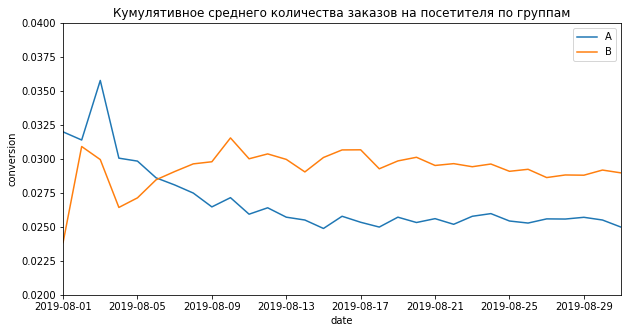

In [203]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивное среднего количества заказов на посетителя по группам')
plt.axis(xmin=cumulativeDataA['date'].min(), xmax=cumulativeDataA['date'].max(), ymin=0.020, ymax=0.04)
plt.legend()
plt.xlabel("date")
plt.ylabel("conversion");
# задаем масштаб осей
#plt.axis(["2019-04-01", '2019-04-23', 0, 0.015]) 

Hа первых этапах конверсия в обеих группах "прыгала", но потом выровнялась, и у группы В была значительно выше.

**Построем график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

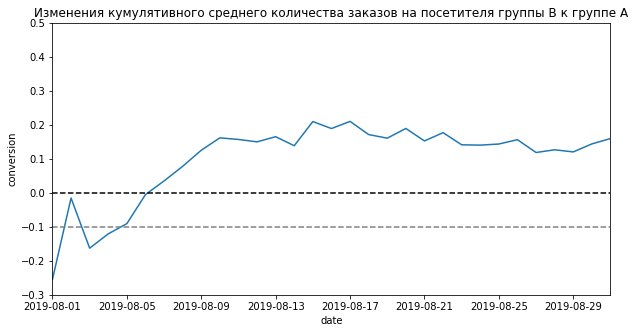

In [205]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(xmin=mergedCumulativeConversions['date'].min(), xmax=mergedCumulativeConversions['date'].max(), ymin=-0.30, ymax=0.5)
plt.xlabel("date")
plt.ylabel("conversion");


В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и постепенно растёт.
В целом сейчас делать какие-либо выводы по тесту рано. Для начала проанализируем аномалии, например крупные заказы.

**Построем точечный график количества заказов по пользователям.**

Изучим гистограмму распределения стоимостей заказов: 

In [177]:
ordersByUsers =  orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})

ordersByUsers


,visitorid,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


Судя по значениям в orders в основном пользователи заказывали только один раз.


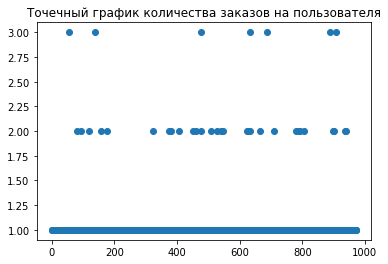

In [178]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов на пользователя')
plt.show()

                                                                                                 

Большинство покупателей заказывали только один раз. Однако имеется доля пользователей с 2 и небольшая часть с тремя заказами.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей**

In [179]:
print(np.percentile(ordersByUsers['orders'], 95)) 
print(np.percentile(ordersByUsers['orders'], 99)) 

1.0
2.0


Не более 5% пользователей оформляли 1 заказ. И 1% пользователей заказывали 2 раза. 

In [180]:
#количество заказов больше 2х удалим, как анамалию 
outlaws_1p = ordersByUsers[ordersByUsers['orders'] > 2]['visitorid'].to_list()

**Построем точечный график стоимостей заказов. Сделаем выводы и предположения.**

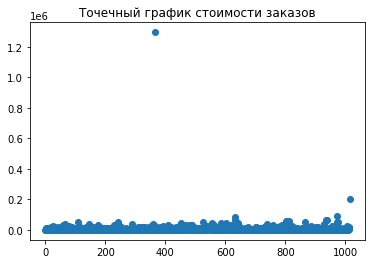

In [181]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.show()   


На графике видно 2 выброса, они и повлияли на средний чек и выручку по группе В.

**Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [182]:
print(np.percentile(orders['revenue'], 95)) 
print(np.percentile(orders['revenue'], 99)) 

26785.0
53904.0


Меньше 5 % заказов дороже 26785 и меньше 1 % дороже 53904. Удалим аномалии дороже 53904

In [198]:
orders_clear = orders.query('revenue <= 53904')


**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

In [184]:
# таблицы с данными по заказам на каждого пользователя
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid')['transactionid'].nunique().reset_index()
ordersByUsersA.columns=['visitorid','orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid')['transactionid'].nunique().reset_index()
ordersByUsersB.columns=['visitorid','orders']

**Посчитаем пользователей из разных групп и соответствие количества заказов. Тем, кто ничего не заказал, будут соответствовать нули**

In [185]:
#посчисчитаем пользователей не совершавшие заказ
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')


In [186]:
# создаем выборки с сырыми данными для стат тестов
sampleA = pd.concat([ordersByUsersA['orders'], freeloadersA])
sampleB = pd.concat([ordersByUsersB['orders'], freeloadersB])

**Посмотрим на значение средний конверсий.
        - H0 - конверсия группы А = конверсии группы В
        - H1 - конверсии групп не равны
        Уровень значимости alpha = .05**

In [187]:
print('p_value: {:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p_value: 0.011
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%


Так как p_value меньше заданного значения alpha, то мы отвергаем гипотизу H0.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

H0 - средний чек группы А = чеку группы В 
H1 - средний чек групп не равен
Уровень значимости alpha = .05 

In [188]:
print('p_value: {:.3f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
))
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

p_value: 0.829
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95


Отвергать гупотезу H0 (средний чек группы А = чеку группы В) не будем, так как p_value больше значения alpha. хотя и разница в средних чеках не большая, различие не статистически значимо

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

In [189]:
# Зачистим данные
ordersByUsers_clear = orders[~orders['visitorid'].isin(outlaws_1p)]


In [190]:
# очищенные таблицы с данными по заказам на каждого пользователя
ordersByUsersA_clear = ordersByUsers_clear[ordersByUsers_clear['group']=='A'].groupby('visitorid')['transactionid'].nunique().reset_index()
ordersByUsersA_clear.columns=['visitorid','orders']

ordersByUsersB_clear = ordersByUsers_clear[ordersByUsers_clear['group']=='B'].groupby('visitorid')['transactionid'].nunique().reset_index()
ordersByUsersB_clear.columns=['visitorid','orders']


In [191]:
#посчитаем пользователей не совершавшие заказ
freeloadersA_clear = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA_clear['orders'])), name='orders')
freeloadersB_clear = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB_clear['orders'])), name='orders')



In [192]:
# создаем выборки с сырыми данными для стат тестов
sampleA_clear = pd.concat([ordersByUsersA_clear['orders'], freeloadersA])
sampleB_clear = pd.concat([ordersByUsersB_clear['orders'], freeloadersB])


In [193]:
print('p_value: {:.3f}'.format(st.mannwhitneyu(sampleA_clear, sampleB_clear)[1]))
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sampleA_clear.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sampleB_clear.mean()))


p_value: 0.008
Средняя конверсия (очищенная) группы А: 2.4%
Средняя конверсия (очищенная) группы B: 2.9%


Отвергаем H0 (средний чек группы А = чеку группы). Очищенные данные показали почти такую же конверсию.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

In [199]:

print('p_value: {:.3f}'.format(st.mannwhitneyu(orders_clear[orders_clean['group']=='A']['revenue'], orders_clean[orders_clear['group']=='B']['revenue'])[1]
))
print('Средний чек (очищенный) группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек (очищенный) группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))


p_value: 0.901
Средний чек (очищенный) группы А: 6504.55
Средний чек (очищенный) группы B: 6298.83


Такая же ситуация с тестом и по среднему чеку, H0 (средний чек группы А = чеку группы В) не отвергаем. Но больше нет сильной разницы между группа А и В по среднему чеку.

### Вывод:
По результатам анализа чистых данных, было выявлено конверсия в группе В выше, средний чек у группы В немного меньше.
Думаю, что нужно продолжить тест, пока графики не зафиксируются и мы соберем больше наблюдений. Но шансы победить у группы B есть.